# Income classification

Dataset description:

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("dataset/income_evaluation.csv")
df.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [4]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
nominal_features = [
    "workclass",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]

ordinal_features = ["education-num"]
redundant_features = ["education"]
numerical_features = ["age", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week"]

target_column = "income"

In [7]:
# Looks like education and education-num provide the same information
# but in different forms. Consider education-num as oridinal encoding of education
df.loc[:, "education-num"].nunique(), df.loc[:, "education"].nunique()

(16, 16)

In [8]:
df.groupby(by=["education-num", "education"])["age"].count().sort_index()

education-num  education    
1               Preschool          51
2               1st-4th           168
3               5th-6th           333
4               7th-8th           646
5               9th               514
6               10th              933
7               11th             1175
8               12th              433
9               HS-grad         10501
10              Some-college     7291
11              Assoc-voc        1382
12              Assoc-acdm       1067
13              Bachelors        5355
14              Masters          1723
15              Prof-school       576
16              Doctorate         413
Name: age, dtype: int64

In [9]:
df.drop(columns=redundant_features, inplace=True)

In [10]:
for col in nominal_features:
    df.loc[:, col] = df[col].astype("category")

for col in ordinal_features:
    df.loc[:, col] = df[col].astype("category")

df.loc[:, target_column] = df.loc[:, target_column].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education-num   32561 non-null  category
 4   marital-status  32561 non-null  category
 5   occupation      32561 non-null  category
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  category
 9   capital-gain    32561 non-null  int64   
 10  capital-loss    32561 non-null  int64   
 11  hours-per-week  32561 non-null  int64   
 12  native-country  32561 non-null  category
 13  income          32561 non-null  category
dtypes: category(9), int64(5)
memory usage: 1.5 MB


In [11]:
# split training and test set
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

X_train.shape, X_test.shape

((29304, 13), (3257, 13))

In [12]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train)

In [13]:
df_train = X_train.copy()
df_train.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,29304.000000,2.930400e+04,29304.000000,29304.000000,29304.000000
mean,38.573539,1.897929e+05,1074.151276,87.560947,40.451167
std,13.631085,1.054498e+05,7362.461438,403.761129,12.380112
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.179245e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783545e+05,0.000000,0.000000,40.000000
75%,48.000000,2.369522e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [14]:
classes, counts = np.unique(y_train, return_counts=True)
pd.Series(counts, index=classes) / y_train.shape[0]

0    0.75918
1    0.24082
dtype: float64

In [15]:
for col in df_train.columns:
    if str(df_train[col].dtype) == "category":
        df_train[col].value_counts()

 Private             20422
 Self-emp-not-inc     2288
 Local-gov            1891
 ?                    1647
 State-gov            1178
 Self-emp-inc         1003
 Federal-gov           856
 Without-pay            13
 Never-worked            6
Name: workclass, dtype: int64

9     9412
10    6546
13    4845
14    1573
11    1240
7     1058
12     962
6      831
4      588
15     525
5      458
8      391
16     370
3      304
2      155
1       46
Name: education-num, dtype: int64

 Married-civ-spouse       13479
 Never-married             9593
 Divorced                  4017
 Separated                  927
 Widowed                    893
 Married-spouse-absent      374
 Married-AF-spouse           21
Name: marital-status, dtype: int64

 Prof-specialty       3756
 Craft-repair         3707
 Exec-managerial      3694
 Adm-clerical         3344
 Sales                3285
 Other-service        2951
 Machine-op-inspct    1808
 ?                    1653
 Transport-moving     1422
 Handlers-cleaners    1247
 Farming-fishing       889
 Tech-support          826
 Protective-serv       577
 Priv-house-serv       137
 Armed-Forces            8
Name: occupation, dtype: int64

 Husband           11888
 Not-in-family      7498
 Own-child          4548
 Unmarried          3076
 Wife               1398
 Other-relative      896
Name: relationship, dtype: int64

 White                 25058
 Black                  2789
 Asian-Pac-Islander      935
 Amer-Indian-Eskimo      267
 Other                   255
Name: race, dtype: int64

 Male      19636
 Female     9668
Name: sex, dtype: int64

 United-States                 26246
 Mexico                          591
 ?                               533
 Philippines                     178
 Germany                         125
 Canada                          108
 Puerto-Rico                     107
 El-Salvador                      93
 India                            91
 Cuba                             86
 England                          76
 South                            72
 Jamaica                          71
 China                            70
 Italy                            67
 Dominican-Republic               63
 Vietnam                          61
 Guatemala                        55
 Poland                           54
 Columbia                         54
 Japan                            53
 Taiwan                           47
 Iran                             41
 Haiti                            38
 Portugal                         34
 France                           27
 Ecuador                          27
 

In [16]:
df_train.replace(to_replace="?", value="other", inplace=True)

In [17]:
df_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [19]:
# using pearson correlation coefficient to see if numerical features are correlated
pd.concat((df_train.loc[:, numerical_features], y_train), axis=1).corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.078118,0.078733,0.061235,0.067141
fnlwgt,-0.078118,1.000000,-0.001215,-0.009508,-0.017886
capital-gain,0.078733,-0.001215,1.000000,-0.031640,0.077229
capital-loss,0.061235,-0.009508,-0.031640,1.000000,0.055071
hours-per-week,0.067141,-0.017886,0.077229,0.055071,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

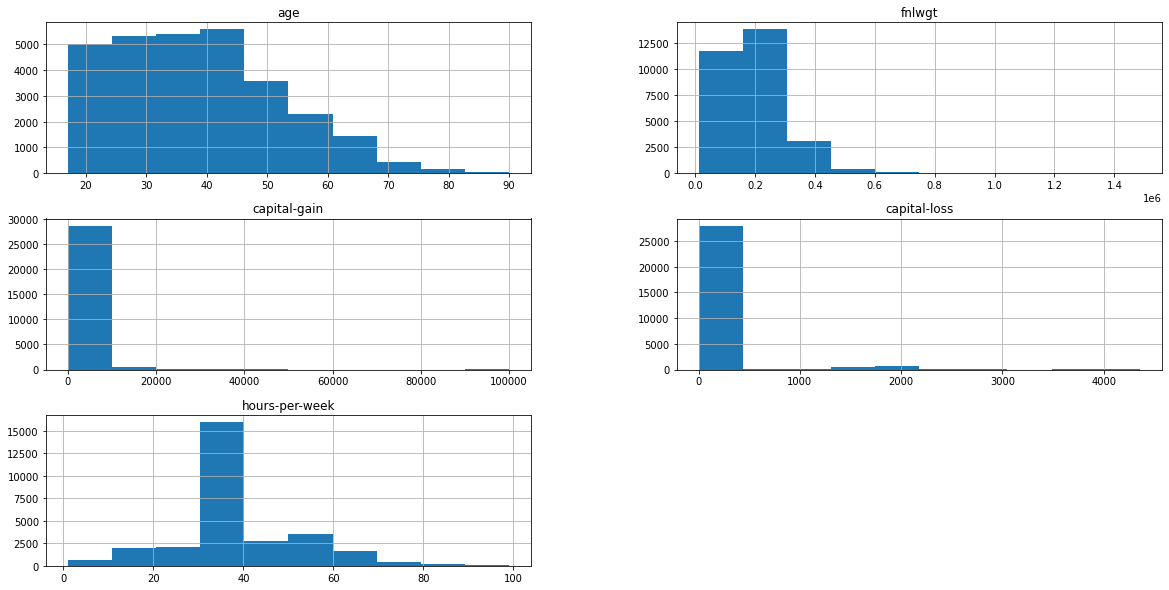

In [24]:
df_train.loc[:, numerical_features].hist(figsize=(20, 10))

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

print(f"Total numerical features: {len(numerical_features)}")
feature_selector = SelectKBest(score_func=f_classif, k=4)
feature_selector.fit(df_train.loc[:, numerical_features], y_train)
feature_selector.get_support()

Total numerical features: 5


SelectKBest(k=4)

array([ True, False,  True,  True,  True])

In [25]:
for col, retain in zip(numerical_features, feature_selector.get_support()):
    if not retain:
        df_train.drop(columns=col, inplace=True)

df_train.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country'],
      dtype='object')

In [38]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder

categories = []
for idx, col in enumerate(nominal_features):
    categories.append(df_train.loc[:, col].unique())

cat_encoder = OrdinalEncoder(categories=categories, dtype=np.int8)
ordinal_encoded = cat_encoder.fit_transform(df_train.loc[:, nominal_features])

scores, pvalues = chi2(ordinal_encoded, y_train)

list(zip(scores, nominal_features))

[(175.33949270705475, 'workclass'),
 (1018.3816429298192, 'marital-status'),
 (88.09139911411148, 'occupation'),
 (2408.1385429507004, 'relationship'),
 (180.9971489410162, 'race'),
 (921.5056239539642, 'sex'),
 (329.5444226865774, 'native-country')]

In [39]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(ordinal_encoded, y_train)

array([0.01681176, 0.10871934, 0.06781965, 0.11661445, 0.00114523,
       0.02767496, 0.00348161])

In [40]:
chi2_selector = SelectKBest(chi2, k=5)
chi2_selector.fit(ordinal_encoded, y_train)
chi2_selector.get_support()

SelectKBest(k=5, score_func=<function chi2 at 0x7f54c470d8b0>)

array([False,  True, False,  True,  True,  True,  True])

In [41]:
mut_info_selector = SelectKBest(mutual_info_classif, k=5)
mut_info_selector.fit(ordinal_encoded, y_train)
mut_info_selector.get_support()

SelectKBest(k=5, score_func=<function mutual_info_classif at 0x7f54c1ec89d0>)

array([ True,  True,  True,  True, False,  True, False])

In [42]:
# as of now I will go with mutual_info_classif
for col, retain in zip(nominal_features, mut_info_selector.get_support()):
    if not retain:
        df_train.drop(columns=col, inplace=True)

df_train.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [49]:
from sklearn.preprocessing import OneHotEncoder

nominal_encoder = OneHotEncoder(sparse=False, dtype=np.int8)
x_train_enc = nominal_encoder.fit_transform(
    df_train.loc[
        :, ["workclass", "education-num", "marital-status", "occupation", "relationship", "sex"]
    ]
)
x_train_enc.shape

(29304, 55)

In [65]:
df_train_enc = pd.DataFrame(
    x_train_enc, columns=np.array(list(chain(*nominal_encoder.categories_)), dtype=object)
)
df_train_enc.shape

(29304, 55)

In [76]:
df_temp = df_train.loc[:, ["age", "capital-gain", "capital-loss", "hours-per-week"]]
df_temp.shape
df_temp.values.shape, df_train_enc.values.shape

cols = list(df_temp.columns) + list(df_train_enc.columns)
df_train_trans = pd.DataFrame(np.c_[df_temp, df_train_enc], columns=cols)

df_train_trans.shape

(29304, 4)

((29304, 4), (29304, 55))

(29304, 59)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf_clf, df_train_trans, y_train, cv=10, n_jobs=-1, scoring="accuracy")
scores.mean(), scores.std()

(0.8424110980305853, 0.00539707366739545)